# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Keras Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

## 1) Load Data

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Display Data

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Check Null Values (No Null Values in the dataset)

In [ ]:
df.isnull().sum()  

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Conver Categorical Columns

In [ ]:
df['CarName'] =df['CarName'].astype('category').cat.codes  
df['fueltype'] =df['fueltype'].astype('category').cat.codes  
df['aspiration'] =df['aspiration'].astype('category').cat.codes  
df['doornumber'] =df['doornumber'].astype('category').cat.codes  
df['carbody'] =df['carbody'].astype('category').cat.codes  
df['drivewheel'] =df['drivewheel'].astype('category').cat.codes  
df['enginelocation'] =df['enginelocation'].astype('category').cat.codes  
df['enginetype '] =df['enginetype'].astype('category').cat.codes  
df['cylindernumber'] =df['cylindernumber'].astype('category').cat.codes  
df['fuelsystem'] =df['fuelsystem'].astype('category').cat.codes  
df['enginetype'] =df['enginetype'].astype('category').cat.codes  

## 3) Split Dataset

In [ ]:
X=df.drop(['car_ID','price'],axis=1)
y=df['price']

## Normalization

In [ ]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

##  50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

In [ ]:
X_test.shape

(103, 25)

## Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [ ]:
clf = Sequential()
clf.add(Dense(10, activation='relu', input_dim=25))
clf.add(Dropout(0.5)) # Dropout Layer
clf.add(Dense(8, activation='relu'))
clf.add(Dropout(0.5)) # Dropout Layer
clf.add(Dense(6, activation='relu'))
clf.add(Dense(1))

## COmpile Model

In [ ]:
clf.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Compiling Model

In [ ]:
history = clf.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

## Prediction

In [ ]:
pred = clf.predict(X_test)

## Evaluation

In [ ]:
mse_score, mae_score = clf.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 42146432.0000 - mae: 3560.3760


In [ ]:
# MSE Score
mse_score

42146432.0

In [ ]:
# MAE Score
mae_score

3560.3759765625

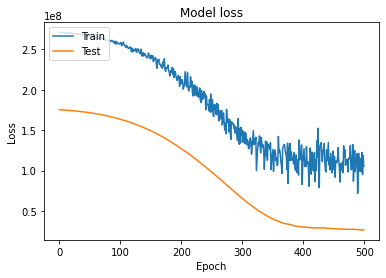

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

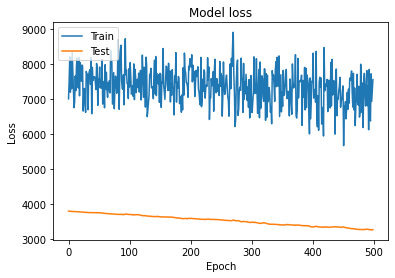

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()